In [ ]:
from IPython.display import HTML
HTML(url="https://deptinfo-ensip.univ-poitiers.fr/FILES/NB/files/nb2.css")

# Graphes en Python

Il existe des modules annexes pour manipuler des graphes. Le plus connu est probablement [networkx](https://networkx.github.io/documentation/stable/).

L'objectif du présent document et de présenter, très rapidement :

* l'utilisation de networkx
* de proposer des pistes pour implémenter soi même les graphes

## Networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt # pour l'affichage

In [ ]:
# Création d'un graphe non orienté
G = nx.Graph()
# Dans ce graphe, on peut ajouter, un noeud, une liste de noeuds, une arête, ou une liste d'arêtes :
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(4, 6)
G.add_edges_from([(1, 2), (1, 3), (2, 3),(3, 4), (3, 5), (4, 5), (4, 7), (7, 6)])

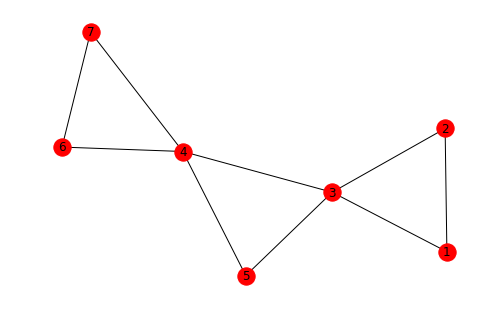

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

Networks contient bien d'autres fonctions, en particulier pour l'affichage (si le graphe a beaucoup de noeuds/arêtes, ça eut devenir difficile de trouver une visualisation adaptée).

Une fois le graphe construit, on peut connaître les voisins d'un sommet, savoir si deux sommets sont reliés...

In [ ]:
# Voisins du sommet 2 :
G[2]

In [ ]:
# Existence d'une arête ?
G.edges[1, 2]

In [ ]:
# Existence d'une arête ?
try:
    G.edges[1, 4]
except KeyError:
    print("Pas d'arête entre 1 et 4")

Bon nombre d'algorithmes sont déjà implémentés.

Par exemple la recherche d'un cirduit Eulérien 

In [ ]:
list(nx.eulerian_circuit(G))

Ou la recherche de plus courts chemins.

In [ ]:
nx.shortest_path(G, 1, 6)

## Représenter un graphe avec la librairie standard

Le choix de la représentation va dépendre des opérations qu'on veut pouvoir réaliser (et du temps qu'on souhaite qu'elles mettent) :

Exemple pour un graphe non orienté, non valué :

* Obtenir la liste des voisins d'un noeud
* Savoir s'il existe une arête entre 2 noeuds

Le graphe peut être un dictionnaire qui à chaque clé (noeud) associe la liste des noeuds qui lui sont reliés.
Dans ce cas, on accède en O(1) à la liste des voisins. Mais on ne peut pas tester en O(1) l'existence d'une arête entre deux noeuds.

Si on remplace la liste des noeuds, par l'ensemble des noeuds, alors on obtient les voisins en O(1) et on teste
l'existence d'une arête en O(1) aussi. 
Cela nécessite de bien connaître les complexités d'utilisation des structures de données standard ([TimeComplexity](https://wiki.python.org/moin/TimeComplexity))

In [ ]:
def add_edge(G, s1, s2, double=True):
    if s1 not in G:
        G[s1] = set()
    G[s1].add(s2)
    if double:
        add_edge(G, s2, s1, double=False)

def add_edges(G, l):
    for e in l:
        add_edge(G, *e)

In [ ]:
G2 = {}
add_edges(G2, ((1, 2), (1, 3), (2, 3),(3, 4), (3, 5), (4, 5), (4, 7), (7, 6), (2, 3)))

In [ ]:
G2

In [ ]:
# 6 et 7 sont reliés ?
6 in G2[7]

Pour la représentation c'est assez délicat... le plus simple est ici d'utiliser networkx...

In [ ]:
def affiche(G):
    G_ = nx.Graph()
    for k, v in G.items():
        for vois in v:
            G_.add_edge(k, vois)
    nx.draw(G_, with_labels=True)
    plt.show()

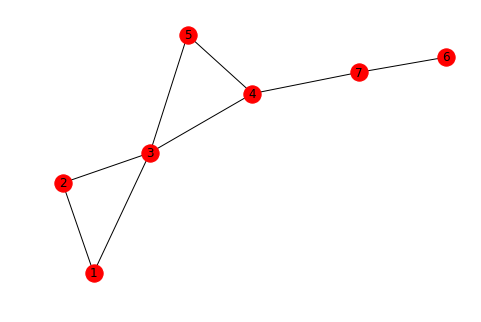

In [ ]:
affiche(G2)

Utiliser la programmation orientée objets pour représenter un graphe serait probablement approprié, mais c'es hors du cadre de cet après midi. Toutefois, si certains connaissent déjà la POO, il est envisageable qu'ils s'en servent.

## Travail à faire

Dans ce qui suit, vous pouvez utiliser une représentation ou une autre. Toutefois, le plus formateur (mais aussi le plus difficile) est de ne **pas** utiliser networkx. Essayez d'implémenter au moins un des algos sans utiliser networkx (parmi distance, excentricité, rayon, centre, diamètre)

### Quelque graphes à utiliser

Voici quelques exemple de graphes, que vous pouvez utiliser plus ou moins immédiatement.

* [Graph of Thrones](https://deptinfo-ensip.univ-poitiers.fr/FILES/NB/files/storm-of-swords.csv). Pour avoir un graphe non orienté non valué, n'utilisez pas la valeur numérique indiquée sur chaque ligne.
* `{0: {1, 2}, 1: {0, 2, 4}, 2: {0, 1, 3}, 3: {2, 8}, 4: {1, 8}, 5: {6, 7}, 6: {5, 7, 8}, 7: {5, 6}, 8: {3, 4, 6}}`
* `{0: {1, 2}, 1: {0, 2, 4}, 2: {0, 1, 3}, 3: {2, 8}, 4: {1, 8}, 5: {6, 7}, 6: {5, 7}, 7: {5, 6}, 8: {3, 4}}`


### Mesures

* nombre de noeuds d'un graphe
* nombre d'arêtes d'un graphe
* noeud**s** d'arité maximale
* distance entre deux sommets arbitraires
* écartement ou excentricité d'un sommet (distance maximale d'un sommet aux autres sommets)
* centres d'un graphe (noeuds d'excentricité minimale)
* rayon d'un graphe (excentricité d'un centre)
* Diamètre d'un graphe

### Parcours

* Parcours en largeur d'un graphe à partir d'un noeud donné
* Parcours en profondeur d'un graphe à partir d'un noeud donné


### Propriétés

* Le graphe est-il connexe ?


### Pagerank

Le calcul du Pagerank peut être fait de plusieurs façons. Une des façons de procéder est la méthode dite du surfeur aléatoire : le surfeur se place sur un sommet, puis navigue de sommet en sommet en suivant les liens. De temps en temps, il repart sur un nouveau sommet choisi aléatoirement. Lors de ses séances de navigation, on compte le nombre de visite qu'il fait sur chaque sommet. La pagerank d'un sommet sera l'estimation de la probabilité de visite du sommet, c'est à dire le nombre de visites du noeud divisé par le nombre de visites total.

Cet algorithme donne une estimation de popularité.

Selon ce critère, quels sont les 10 personnages les plus populaires de GOT ?

### Questions en plus...
* Le graphe est-il un arbre ?
* Le graphe est-il complet ?
* Recherche d'un parcours Eulerien (difficile, à faire chez soi)
* Recherche d'un parcours Hamiltonien (difficile, à faire chez soi)

### Problèmes sur les graphes

* [Les Ewoks sont tous copains](https://callicode.fr/pydefis/AmisEwoks/txt) (illustration expérience de Milgram)
* [Machine à fabriquer des Pokemons](https://callicode.fr/pydefis/MachineAFabriquer/txt) (le pb est facile à modéliser avec un graphe)
* [À la recherche du système Kamino](https://callicode.fr/pydefis/RechercheKamino/txt)
* [Cerbère](https://callicode.fr/pydefis/Hercule12Cerbere/txt) (pas évident de voir où se cache le graphe...)